<a href="https://colab.research.google.com/github/sakethjaxx/Machine_learning_guided_projects/blob/main/Iris_dataset_logistic_regression_on_regularization_prevent_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L1 Accuracy: 1.0
L2 Accuracy: 1.0

Feature Coefficients:
sepal length (cm)         | L1:  0.0000 | L2: -0.6866
sepal width (cm)          | L1:  1.1393 | L2:  1.3136
petal length (cm)         | L1: -3.8399 | L2: -1.5322
petal width (cm)          | L1:  0.0000 | L2: -1.3317


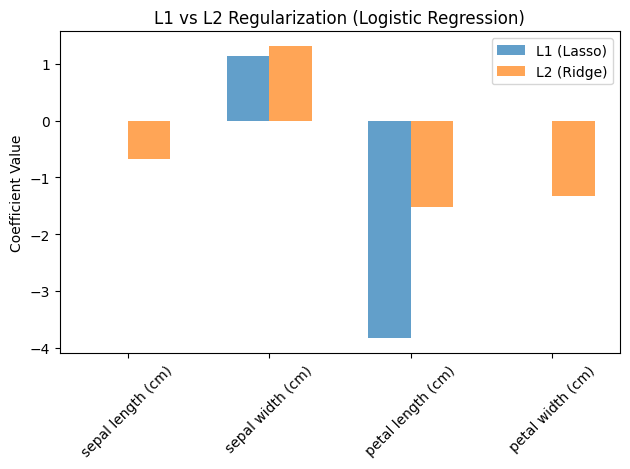

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
X, y = load_iris(return_X_y=True)

# For simplicity, we reduce it to a binary classification (class 0 vs others)
y = (y == 0).astype(int)  # 1 if class 0, else 0

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Logistic Regression with L1 regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
l1_model.fit(X_train_scaled, y_train)

# 5. Train Logistic Regression with L2 regularization
l2_model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
l2_model.fit(X_train_scaled, y_train)

# 6. Predict and evaluate
y_pred_l1 = l1_model.predict(X_test_scaled)
y_pred_l2 = l2_model.predict(X_test_scaled)

print("L1 Accuracy:", accuracy_score(y_test, y_pred_l1))
print("L2 Accuracy:", accuracy_score(y_test, y_pred_l2))

# 7. Compare coefficients
feature_names = load_iris().feature_names
coef_l1 = l1_model.coef_[0]
coef_l2 = l2_model.coef_[0]

# Print coefficients
print("\nFeature Coefficients:")
for name, l1, l2 in zip(feature_names, coef_l1, coef_l2):
    print(f"{name:25s} | L1: {l1: .4f} | L2: {l2: .4f}")

# 8. Visualize
x = np.arange(len(feature_names))
plt.bar(x - 0.15, coef_l1, width=0.3, label='L1 (Lasso)', alpha=0.7)
plt.bar(x + 0.15, coef_l2, width=0.3, label='L2 (Ridge)', alpha=0.7)
plt.xticks(x, feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("L1 vs L2 Regularization (Logistic Regression)")
plt.legend()
plt.tight_layout()
plt.show()
